# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.sparse import hstack
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [4]:
df = pd.read_csv('COVID clinical trials.csv')
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


## Info and Description of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [159]:
df.describe(include='object')

,NCT Number,Status,Study Results,Conditions,Sponsor/Collaborators,Gender,Funded Bys,Study Type,Study Designs,Other IDs,URL,Country,Title,Interventions,Outcome Measures,age_category,Phase,year_month,combined_text,cleaned_text
count,5261,5261,5261,5261,5261,5261,5261,5261,5261,5260,5261,5261,5261,5261,5261,5261,5261,5261,5261,5261
unique,5261,8,2,2647,3354,3,26,2,258,5219,5261,117,5255,3858,5195,3,6,76,5261,5259
top,NCT04804917,Recruiting,No Results Available,covid-19,assistance publique - hôpitaux de paris,All,Other,Interventional,"[observational model: cohort, time perspective...",COVID-19,https://ClinicalTrials.gov/show/NCT04804917,united states,acalabrutinib study with best supportive care ...,nan,mortality,Adult,Not Applicable,2020-04,3year followup of the mind my mind rct nan the...,post covid infection central sensitisation ind...
freq,1,2733,5225,1508,62,5075,4118,2981,958,5,1,1155,2,832,7,4257,3711,825,1,2


In [7]:
df.shape

(5783, 27)

In [8]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

## Data Pre-processing

- Will involve handling missing values, data inconsistencies
- Dropping of unnecessary columns and columns with a lot of missing values
- Feature Engineering

In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Results First Posted       5747
Study Documents            5601
Acronym                    3303
Phases                     2461
Interventions               886
Locations                   585
Primary Completion Date      36
Completion Date              36
Study Designs                35
Outcome Measures             35
Start Date                   34
Enrollment                   34
Gender                       10
Other IDs                     1
dtype: int64

In [10]:
df.drop(columns=['Acronym', 'Study Documents', 'Results First Posted'], inplace=True)

In [11]:
df['Phases'].fillna('Not Applicable', inplace=True)
df['Gender'].fillna('All', inplace=True)
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)
df.dropna(subset=['Start Date', 'Completion Date'], inplace=True)

In [12]:
text_cols = ['Title', 'Conditions', 'Interventions', 'Outcome Measures', 
             'Sponsor/Collaborators', 'Study Designs', 'Locations']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [13]:
df['Conditions'] = df['Conditions'].str.replace(r'covid[- ]?19|sars[- ]?cov[- ]?2', 'covid-19', regex=True)

In [14]:
multi_cols = ['Interventions', 'Study Designs', 'Phases']
for col in multi_cols:
    df[col] = df[col].astype(str).str.split('|')

In [15]:
date_cols = ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['Study_Duration_Days'] = (df['Completion Date'] - df['Start Date']).dt.days

In [16]:
df['Start_Year'] = df['Start Date'].dt.year

In [17]:
df['Country'] = df['Locations'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else np.nan)

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(value):
    # Handle missing values
    if value is None or (isinstance(value, float) and np.isnan(value)):
        return ""
    
    # Handle lists or numpy arrays
    if isinstance(value, (list, np.ndarray)):
        value = " ".join(map(str, value))
    
    # Convert to string (covers numbers, booleans, etc.)
    value = str(value)
    
    # Clean and normalize
    value = re.sub(r'[^a-zA-Z0-9\s]', '', value)
    value = value.lower().strip()
    return value
for col in ['Title', 'Interventions', 'Outcome Measures']:
    df[f'{col}_clean'] = df[col].apply(clean_text)

In [19]:
df.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,First Posted,Last Update Posted,Locations,URL,Study_Duration_Days,Start_Year,Country,Title_clean,Interventions_clean,Outcome Measures_clean
0,1,NCT04785898,diagnostic performance of the id now™ covid-19...,"Active, not recruiting",No Results Available,covid-19,[diagnostic test: id now™ covid-19 screening t...,evaluate the diagnostic performance of the id ...,groupe hospitalier paris saint joseph,All,...,2021-03-08,2021-03-08,"groupe hospitalier paris saint-joseph, paris, ...",https://ClinicalTrials.gov/show/NCT04785898,172.0,2020.0,france,diagnostic performance of the id now covid19 s...,diagnostic test id now covid19 screening test,evaluate the diagnostic performance of the id ...
1,2,NCT04595136,study to evaluate the efficacy of covid19-0001...,Not yet recruiting,No Results Available,covid-19 infection,"[drug: drug covid19-0001-usr, drug: normal sal...",change on viral load results from baseline aft...,united medical specialties,All,...,2020-10-20,2020-10-20,"cimedical, barranquilla, atlantico, colombia",https://ClinicalTrials.gov/show/NCT04595136,88.0,2020.0,colombia,study to evaluate the efficacy of covid190001u...,drug drug covid190001usr drug normal saline,change on viral load results from baseline aft...
2,3,NCT04395482,lung ct scan analysis of sars-cov2 induced lun...,Recruiting,No Results Available,covid-19,[other: lung ct scan analysis in covid-19 pati...,a qualitative analysis of parenchymal lung dam...,university of milano bicocca,All,...,2020-05-20,2020-11-09,"ospedale papa giovanni xxiii, bergamo, italy|p...",https://ClinicalTrials.gov/show/NCT04395482,404.0,2020.0,san marino,lung ct scan analysis of sarscov2 induced lung...,other lung ct scan analysis in covid19 patients,a qualitative analysis of parenchymal lung dam...
3,4,NCT04416061,the role of a private hospital in hong kong am...,"Active, not recruiting",No Results Available,covid,[diagnostic test: covid 19 diagnostic test],proportion of asymptomatic subjects|proportion...,hong kong sanatorium & hospital,All,...,2020-06-04,2020-06-04,"hong kong sanatorium & hospital, hong kong, ho...",https://ClinicalTrials.gov/show/NCT04416061,98.0,2020.0,hong kong,the role of a private hospital in hong kong am...,diagnostic test covid 19 diagnostic test,proportion of asymptomatic subjectsproportion ...
4,5,NCT04395924,maternal-foetal transmission of sars-cov-2,Recruiting,No Results Available,maternal fetal infection transmission|covid-19...,[diagnostic test: diagnosis of sars-cov2 by rt...,covid-19 by positive pcr in cord blood and / o...,centre hospitalier régional d'orléans|centre d...,Female,...,2020-05-20,2020-06-04,"chr orléans, orléans, france",https://ClinicalTrials.gov/show/NCT04395924,NaN,2020.0,france,maternalfoetal transmission of sarscov2,diagnostic test diagnosis of sarscov2 by rtpcr...,covid19 by positive pcr in cord blood and or ...


In [20]:
text_columns = ['Title', 'Interventions', 'Outcome Measures', 'Locations']

df.drop(columns=text_columns, inplace=True)
df.rename(columns={
    'Title_clean': 'Title',
    'Interventions_clean': 'Interventions',
    'Outcome Measures_clean': 'Outcome Measures'
}, inplace=True)

In [21]:
def extract_age_range(age_str):
    if pd.isnull(age_str):
        return (np.nan, np.nan)
    age_str = age_str.lower()
    if "all" in age_str:
        return (0, None)
    elif "child" in age_str:
        return (0, None)
    elif "to" in age_str:
        nums = re.findall(r'\d+', age_str)
        return (int(nums[0]), int(nums[1])) if len(nums) == 2 else (np.nan, np.nan)
    elif "and older" in age_str:
        num = re.findall(r'\d+', age_str)
        return (int(num[0]), None) if num else (np.nan, np.nan)
    else:
        num = re.findall(r'\d+', age_str)
        return (int(num[0]), int(num[0])) if num else (np.nan, np.nan)

In [22]:
def categorize_age(min_age):
    if pd.isna(min_age):
        return "Unknown"
    elif min_age < 18:
        return "Child"
    elif min_age < 65:
        return "Adult"
    else:
        return "Older Adult"

In [23]:
df[['min_age', 'max_age']] = df['Age'].apply(lambda x: pd.Series(extract_age_range(x)))
df['age_category'] = df['min_age'].apply(categorize_age)

| Category        | Definition          |
| --------------- | ------------------- |
| **Child**       | Min age < 18        |
| **Adult**       | 18 ≤ Min age < 65   |
| **Older Adult** | Min age ≥ 65        |
| **All Ages**    | Includes all ranges |

To make Age column more consitent, we will categorize into groups according to the above table.

In [25]:
df.drop(columns=['Age', 'min_age', 'max_age'], inplace=True)

In [26]:
df['age_category'].value_counts()

age_category
Adult          4674
Child           997
Older Adult      76
Name: count, dtype: int64

The Phase column is going to be made consistent by applying the necessary changes.

In [27]:
def simplify_phase(phase_str):
    if 'Phase 1' in phase_str and 'Phase 2' in phase_str:
        return 'Phase 1/2'
    elif 'Phase 2' in phase_str and 'Phase 3' in phase_str:
        return 'Phase 2/3'
    elif 'Phase 1' in phase_str:
        return 'Phase 1'
    elif 'Phase 2' in phase_str:
        return 'Phase 2'
    elif 'Phase 3' in phase_str:
        return 'Phase 3'
    else:
        return 'Not Applicable'

df['Phase'] = df['Phases'].apply(simplify_phase)

In [28]:
df.drop('Phases', axis=1, inplace=True)

In [29]:
df.to_csv("covid_clinical_trials_cleaned.csv", index=False)

In [30]:
# Convert 'Start Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Drop null dates if any
df = df.dropna(subset=['Start Date'])

# Extract useful temporal features
df['year'] = df['Start Date'].dt.year
df['month'] = df['Start Date'].dt.month
df['year_month'] = df['Start Date'].dt.to_period('M').astype(str)

In [31]:
df.head()

,Rank,NCT Number,Status,Study Results,Conditions,Sponsor/Collaborators,Gender,Enrollment,Funded Bys,Study Type,...,Start_Year,Country,Title,Interventions,Outcome Measures,age_category,Phase,year,month,year_month
0,1,NCT04785898,"Active, not recruiting",No Results Available,covid-19,groupe hospitalier paris saint joseph,All,1000.0,Other,Interventional,...,2020.0,france,diagnostic performance of the id now covid19 s...,diagnostic test id now covid19 screening test,evaluate the diagnostic performance of the id ...,Adult,Not Applicable,2020,11,2020-11
1,2,NCT04595136,Not yet recruiting,No Results Available,covid-19 infection,united medical specialties,All,60.0,Other,Interventional,...,2020.0,colombia,study to evaluate the efficacy of covid190001u...,drug drug covid190001usr drug normal saline,change on viral load results from baseline aft...,Adult,Phase 1/2,2020,11,2020-11
2,3,NCT04395482,Recruiting,No Results Available,covid-19,university of milano bicocca,All,500.0,Other,Observational,...,2020.0,san marino,lung ct scan analysis of sarscov2 induced lung...,other lung ct scan analysis in covid19 patients,a qualitative analysis of parenchymal lung dam...,Adult,Not Applicable,2020,5,2020-05
3,4,NCT04416061,"Active, not recruiting",No Results Available,covid,hong kong sanatorium & hospital,All,2500.0,Industry,Observational,...,2020.0,hong kong,the role of a private hospital in hong kong am...,diagnostic test covid 19 diagnostic test,proportion of asymptomatic subjectsproportion ...,Child,Not Applicable,2020,5,2020-05
4,5,NCT04395924,Recruiting,No Results Available,maternal fetal infection transmission|covid-19...,centre hospitalier régional d'orléans|centre d...,Female,50.0,Other,Observational,...,2020.0,france,maternalfoetal transmission of sarscov2,diagnostic test diagnosis of sarscov2 by rtpcr...,covid19 by positive pcr in cord blood and or ...,Adult,Not Applicable,2020,5,2020-05


# Exploratory Data Analysis

## COVID-19 Trials over Time

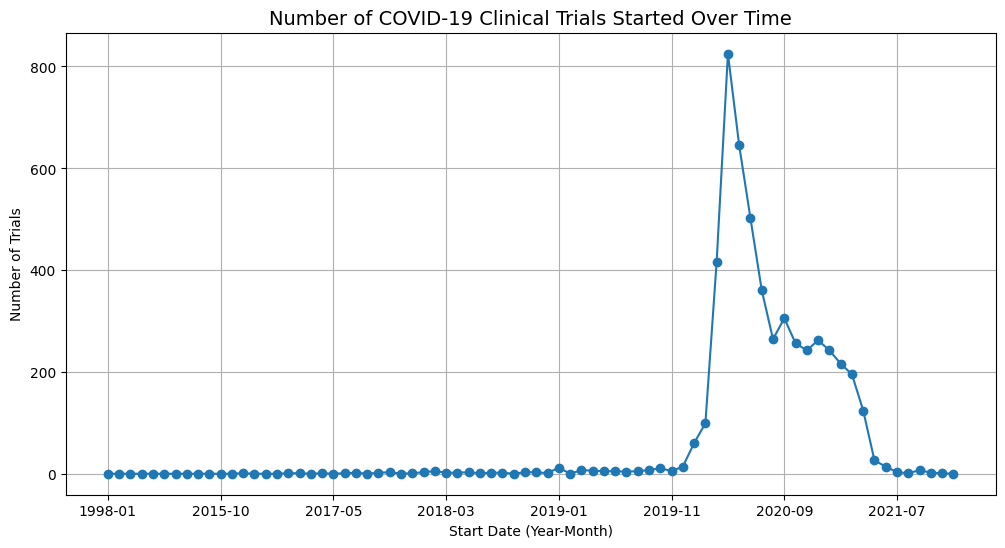

In [32]:
# Group by year-month
time_trend = df.groupby('year_month').size()

# Plot
plt.figure(figsize=(12, 6))
time_trend.plot(kind='line', marker='o')
plt.title("Number of COVID-19 Clinical Trials Started Over Time", fontsize=14)
plt.xlabel("Start Date (Year-Month)")
plt.ylabel("Number of Trials")
plt.grid(True)
plt.show()

The number of trials peaked in the year 2020, and later started to fall probably due to the release of safe vaccines.

## COVID-19 Trials by Year

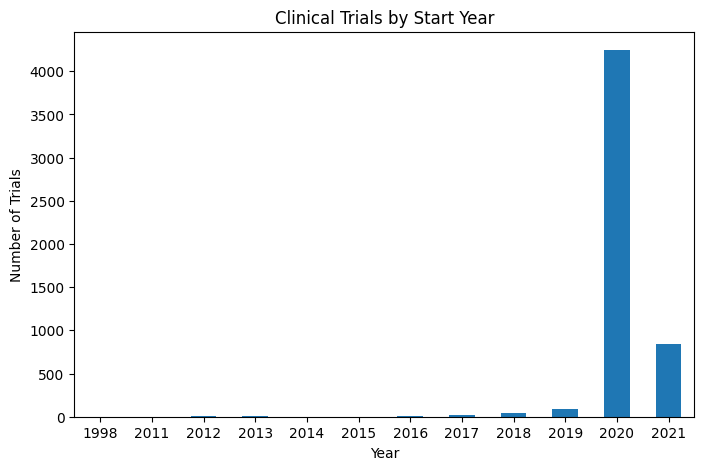

In [33]:
plt.figure(figsize=(8,5))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Clinical Trials by Start Year")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.xticks(rotation=0)
plt.show()

The number of trials peaked in 2020. That was when COVID-19 cases were at peak and clinical trials were carried out to bring to people a safe vaccine.

## Trials per Year by Phase

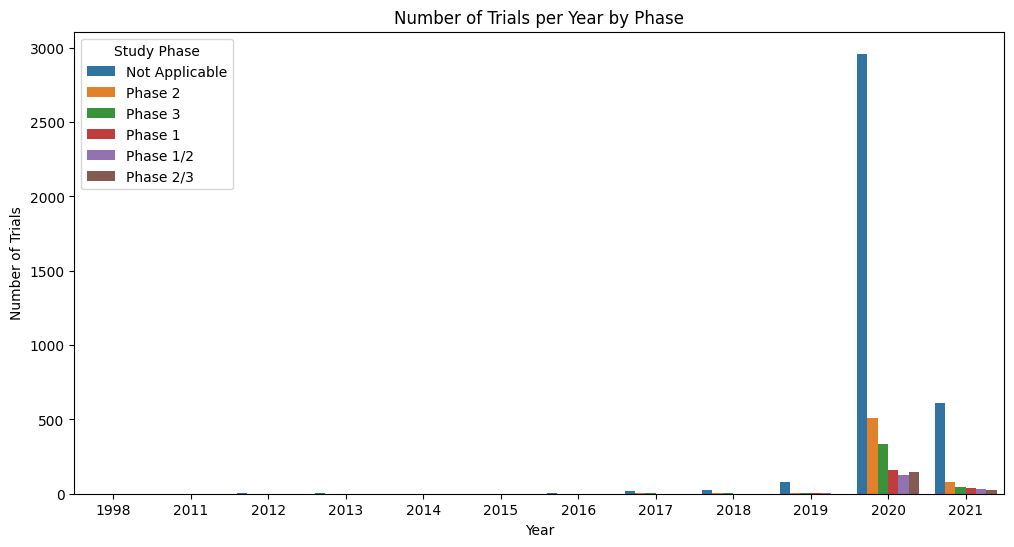

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year', hue='Phase')
plt.title("Number of Trials per Year by Phase")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.legend(title="Study Phase")
plt.show()

## Distribution of Other Features

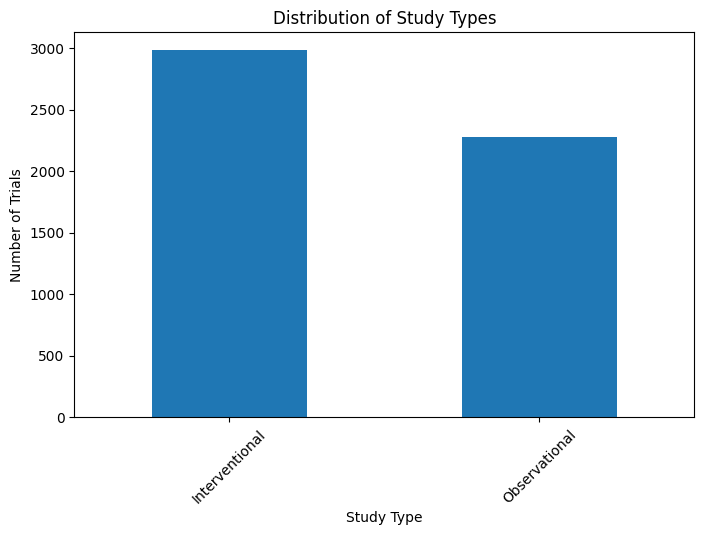

In [35]:
plt.figure(figsize=(8,5))
df['Study Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Study Types")
plt.xlabel("Study Type")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()

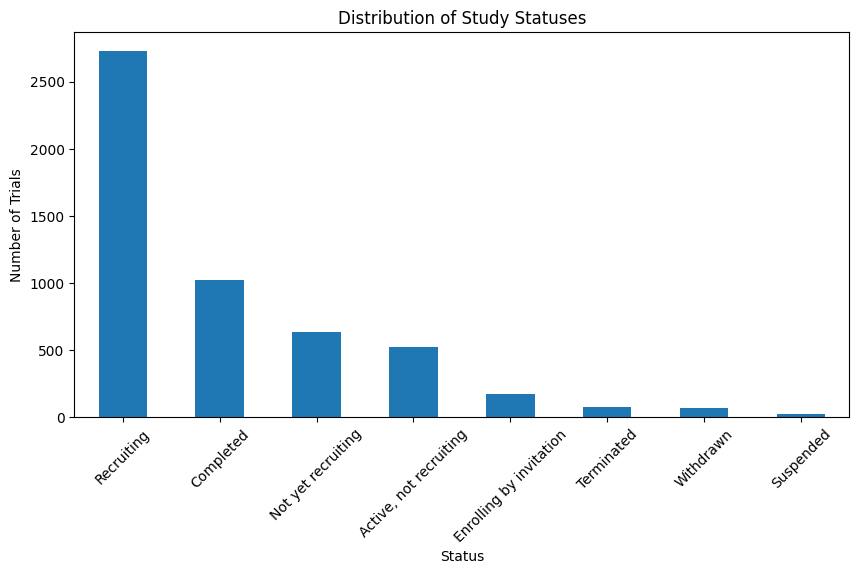

In [36]:
plt.figure(figsize=(10,5))
df['Status'].value_counts().plot(kind='bar')
plt.title("Distribution of Study Statuses")
plt.xlabel("Status")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()

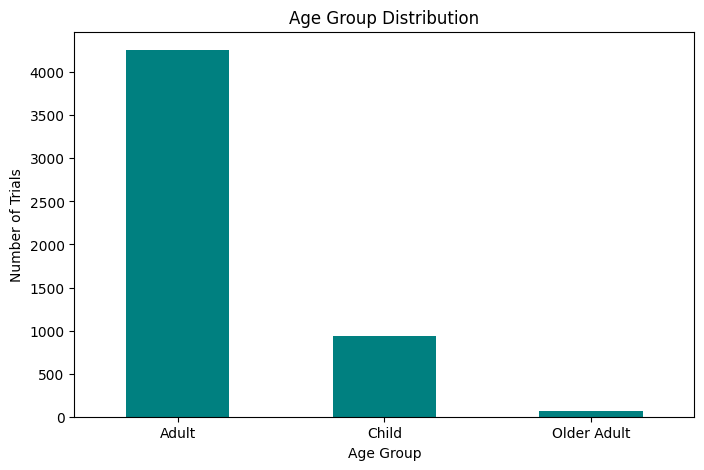

In [37]:
plt.figure(figsize=(8,5))
df['age_category'].value_counts().plot(kind='bar', color='teal')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Trials")
plt.xticks(rotation=0)
plt.show()

## Study Type and Study Phase Comparison

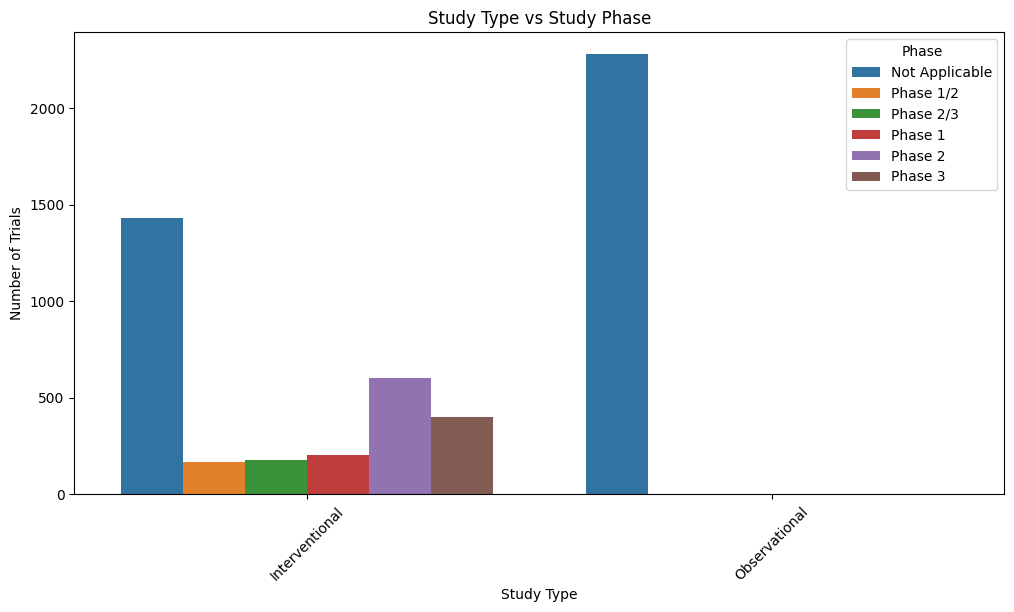

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Study Type', hue='Phase')
plt.title("Study Type vs Study Phase")
plt.xlabel("Study Type")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.legend(title="Phase")
plt.show()

## Trial Status Comparison

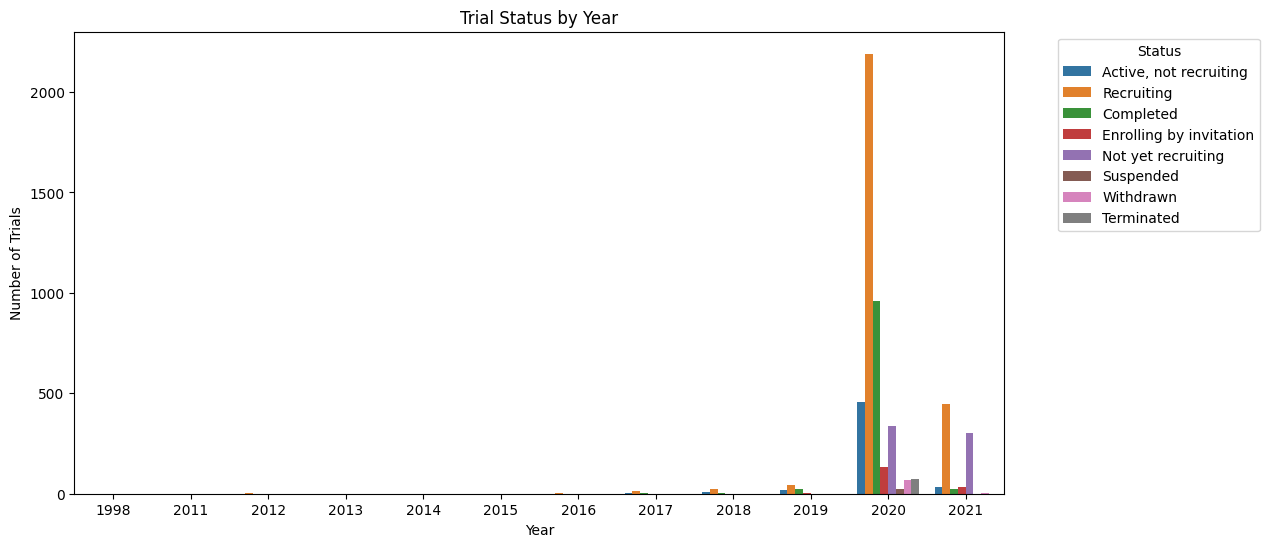

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year', hue='Status')
plt.title("Trial Status by Year")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.legend(title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
df.head()

,Rank,NCT Number,Status,Study Results,Conditions,Sponsor/Collaborators,Gender,Enrollment,Funded Bys,Study Type,...,Start_Year,Country,Title,Interventions,Outcome Measures,age_category,Phase,year,month,year_month
0,1,NCT04785898,"Active, not recruiting",No Results Available,covid-19,groupe hospitalier paris saint joseph,All,1000.0,Other,Interventional,...,2020.0,france,diagnostic performance of the id now covid19 s...,diagnostic test id now covid19 screening test,evaluate the diagnostic performance of the id ...,Adult,Not Applicable,2020,11,2020-11
1,2,NCT04595136,Not yet recruiting,No Results Available,covid-19 infection,united medical specialties,All,60.0,Other,Interventional,...,2020.0,colombia,study to evaluate the efficacy of covid190001u...,drug drug covid190001usr drug normal saline,change on viral load results from baseline aft...,Adult,Phase 1/2,2020,11,2020-11
2,3,NCT04395482,Recruiting,No Results Available,covid-19,university of milano bicocca,All,500.0,Other,Observational,...,2020.0,san marino,lung ct scan analysis of sarscov2 induced lung...,other lung ct scan analysis in covid19 patients,a qualitative analysis of parenchymal lung dam...,Adult,Not Applicable,2020,5,2020-05
3,4,NCT04416061,"Active, not recruiting",No Results Available,covid,hong kong sanatorium & hospital,All,2500.0,Industry,Observational,...,2020.0,hong kong,the role of a private hospital in hong kong am...,diagnostic test covid 19 diagnostic test,proportion of asymptomatic subjectsproportion ...,Child,Not Applicable,2020,5,2020-05
4,5,NCT04395924,Recruiting,No Results Available,maternal fetal infection transmission|covid-19...,centre hospitalier régional d'orléans|centre d...,Female,50.0,Other,Observational,...,2020.0,france,maternalfoetal transmission of sarscov2,diagnostic test diagnosis of sarscov2 by rtpcr...,covid19 by positive pcr in cord blood and or ...,Adult,Not Applicable,2020,5,2020-05


## Textual Feature Analysis

### `Title`

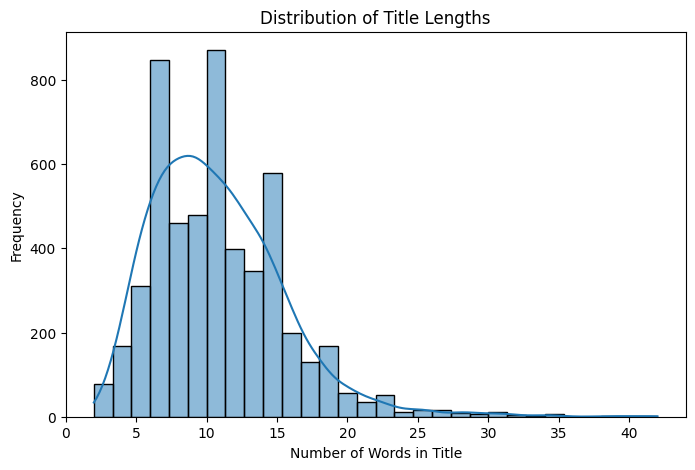

In [41]:
# Create text length features
df['title_length'] = df['Title'].str.split().apply(len)
df['intervention_length'] = df['Interventions'].str.split().apply(len)
df['outcome_length'] = df['Outcome Measures'].str.split().apply(len)

# Plot title length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title("Distribution of Title Lengths")
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.show()

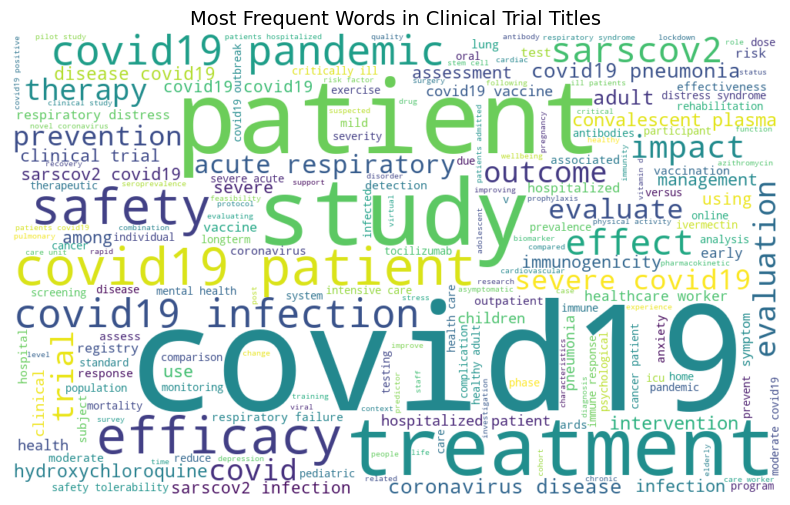

In [42]:
text = ' '.join(df['Title'].dropna().astype(str))
wc = WordCloud(width=1000, height=600, background_color='white',
               stopwords=STOPWORDS, colormap='viridis').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Clinical Trial Titles", fontsize=14)
plt.show()

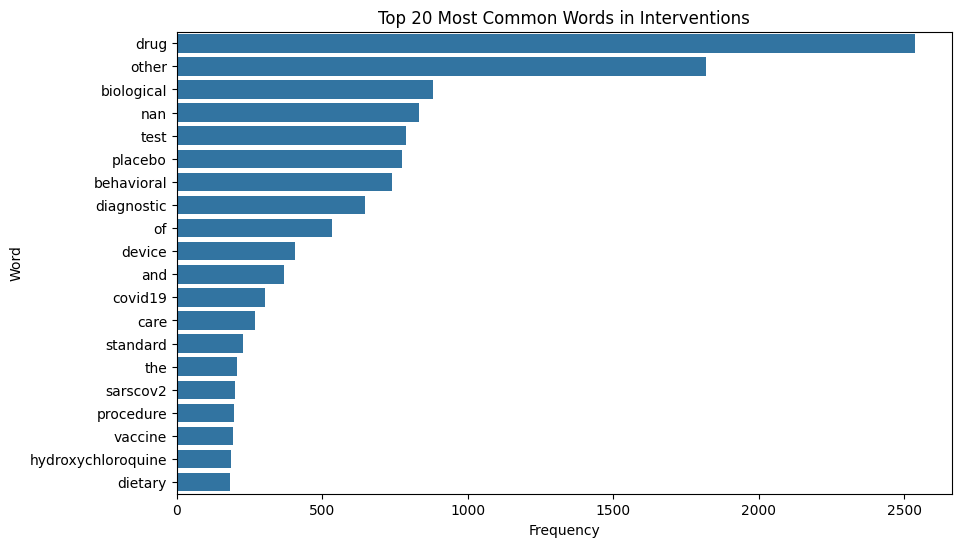

In [43]:
# Flatten all interventions
all_interventions = df['Interventions'].dropna().astype(str).tolist()
intervention_words = [word for text in all_interventions for word in text.split()]
common_interventions = Counter(intervention_words).most_common(20)

# Convert to DataFrame for plotting
int_df = pd.DataFrame(common_interventions, columns=['Intervention', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=int_df, y='Intervention', x='Count')
plt.title("Top 20 Most Common Words in Interventions")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

### `Outcome Measures`

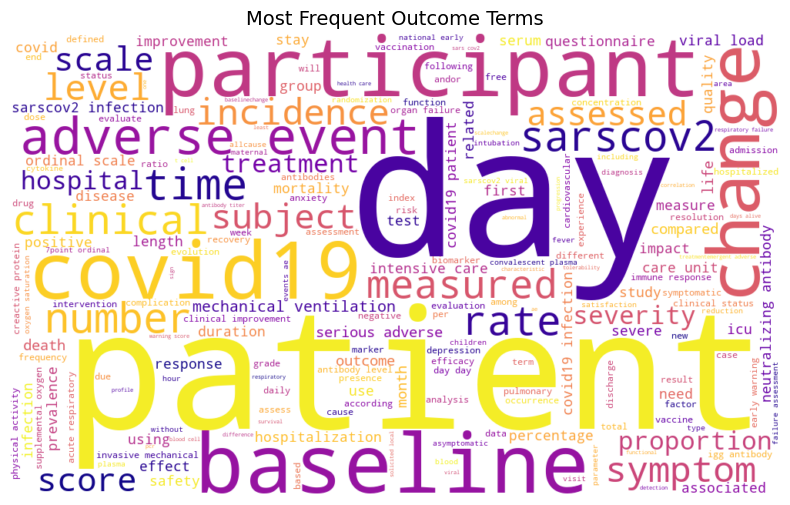

In [44]:
outcome_text = ' '.join(df['Outcome Measures'].dropna().astype(str))
outcome_wc = WordCloud(width=1000, height=600, background_color='white',
                       stopwords=STOPWORDS, colormap='plasma').generate(outcome_text)

plt.figure(figsize=(12,6))
plt.imshow(outcome_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Outcome Terms", fontsize=14)
plt.show()

In [45]:
# Combine text columns
df['combined_text'] = (
    df['Title'].fillna('') + ' ' +
    df['Interventions'].fillna('') + ' ' +
    df['Outcome Measures'].fillna('')
)

In [46]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)   # remove numbers & punctuation
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['combined_text'].apply(clean_text)

In [47]:
vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Topic Modeling

In [48]:
n_topics = 7
lda_model = LatentDirichletAllocation(n_components=n_topics,
                                      random_state=42,
                                      learning_method='batch')
lda_model.fit(tfidf_matrix)

,n_components,7
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [49]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 15)


Topic 1:
supplement | dietary | vitamin | covid | device | breath | smell | olfactory | test | symptom | patient | zinc | mri | taste | nan

Topic 2:
drug | day | baseline | ordinal | participant | clinical | oxygen | point | improvement | patient | scale | time | change | treatment | covid

Topic 3:
plasma | convalescent | covid | patient | nan | prone | outcome | ultrasound | critically | clinical | ill | biological | infection | registry | mask

Topic 4:
behavioral | covid | health | pandemic | anxiety | questionnaire | scale | quality | stress | change | impact | physical | intervention | life | survey

Topic 5:
sarscov | covid | test | antibody | diagnostic | patient | biological | infection | vaccine | blood | adverse | participant | day | cell | study

Topic 6:
drug | day | covid | patient | mechanical | mortality | care | hospital | icu | ventilation | treatment | respiratory | intensive | admission | infection

Topic 7:
drug | covid | adverse | safety | hydroxychloroquine | v

In [50]:
topic_values = lda_model.transform(tfidf_matrix)
df['dominant_topic'] = topic_values.argmax(axis=1) + 1

## Time-Series Plot

In [52]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Year'] = df['Start Date'].dt.year
df['Month'] = df['Start Date'].dt.to_period('M')

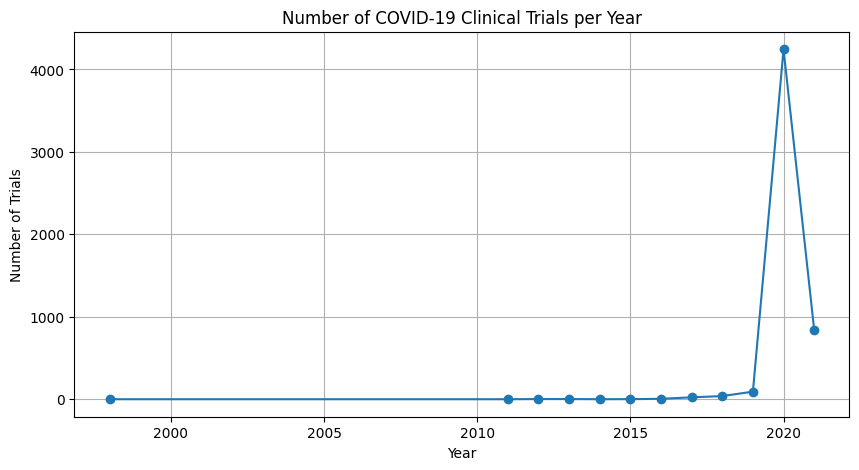

In [53]:
trials_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(trials_per_year.index, trials_per_year.values, marker='o')
plt.title("Number of COVID-19 Clinical Trials per Year")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.grid(True)
plt.show()

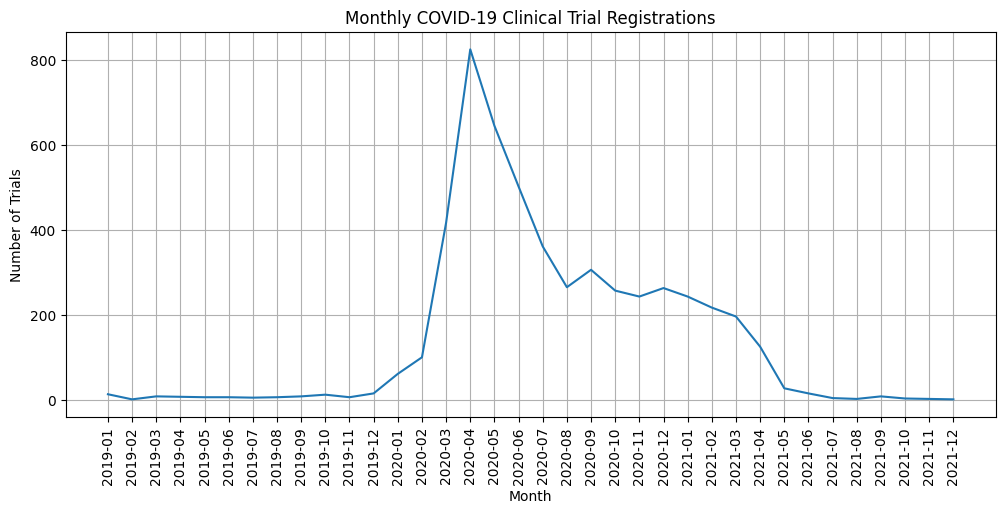

In [54]:
trials_per_month = df[df['Year'] >= 2019]['Month'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(trials_per_month.index.astype(str), trials_per_month.values)
plt.xticks(rotation=90)
plt.title("Monthly COVID-19 Clinical Trial Registrations")
plt.xlabel("Month")
plt.ylabel("Number of Trials")
plt.grid(True)
plt.show()

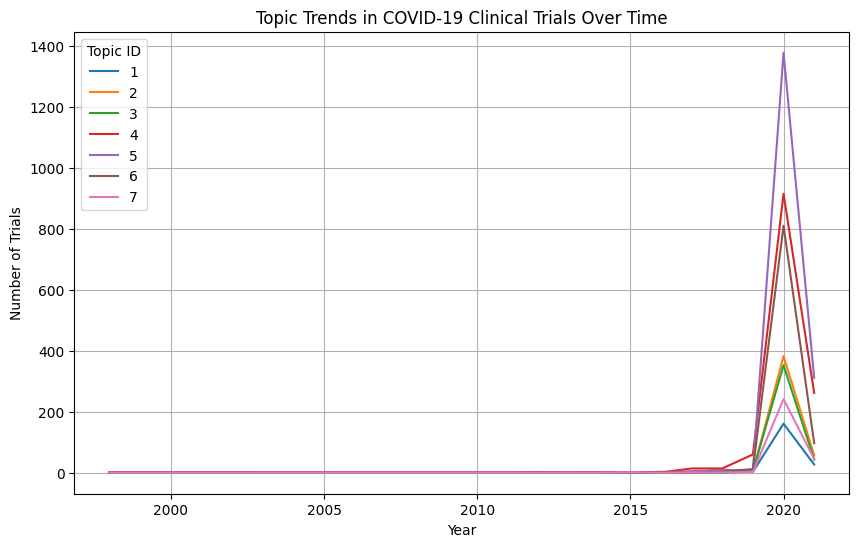

In [55]:
topic_trend = df.groupby(['Year', 'dominant_topic']).size().unstack(fill_value=0)

topic_trend.plot(kind='line', figsize=(10,6))
plt.title("Topic Trends in COVID-19 Clinical Trials Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.legend(title="Topic ID", loc="upper left")
plt.grid(True)
plt.show()

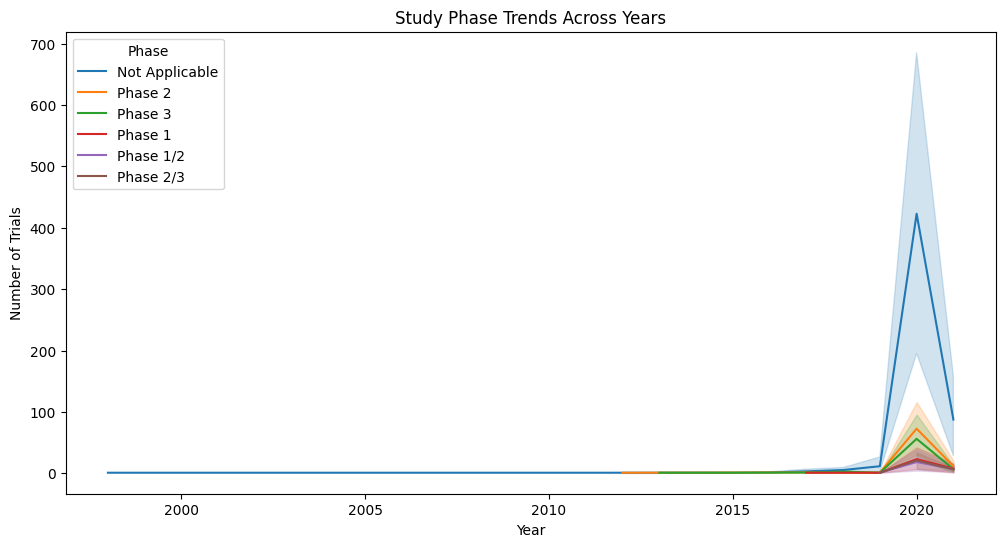

In [56]:
phase_topic_trend = df.groupby(['Year', 'Phase', 'dominant_topic']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=phase_topic_trend, x='Year', y='count', hue='Phase')
plt.title("Study Phase Trends Across Years")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.legend(title="Phase", loc='upper left')
plt.show()

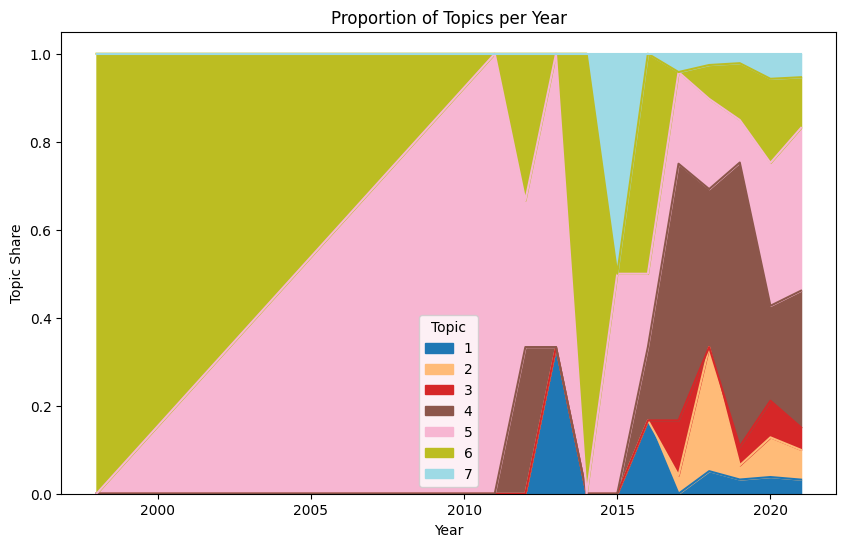

In [57]:
topic_share = topic_trend.div(topic_trend.sum(axis=1), axis=0)
topic_share.plot(kind='area', stacked=True, figsize=(10,6), colormap='tab20')
plt.title("Proportion of Topics per Year")
plt.xlabel("Year")
plt.ylabel("Topic Share")
plt.legend(title="Topic")
plt.show()

## Plotting Trials by Country

In [58]:
# Remove missing/empty values
df['Country'] = df['Country'].fillna("Unknown").str.strip()

# Filter out countries that are "Unknown"
df_valid = df[df['Country'] != "Unknown"]

#Count number of trials per country
country_counts = (
    df_valid['Country']
    .value_counts()
    .reset_index()
)
country_counts.columns = ["Country", "Count"]

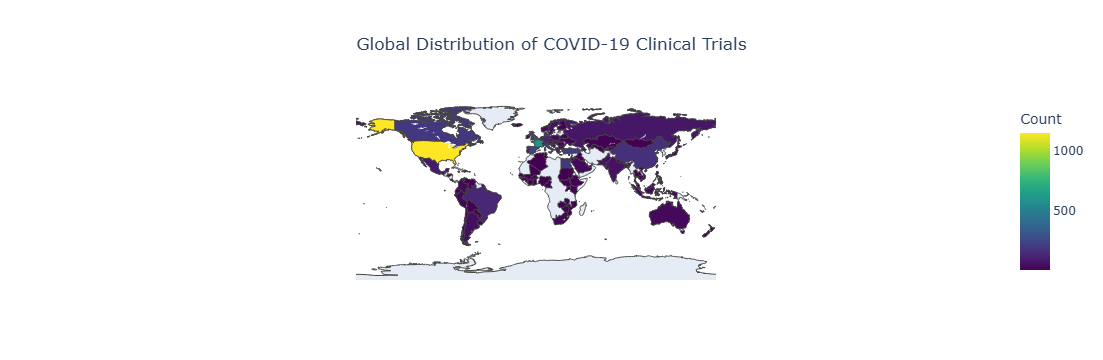

In [59]:
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    color_continuous_scale="Viridis",
    title="Global Distribution of COVID-19 Clinical Trials",
    hover_name="Country",
    hover_data={"Count": True}
)

# Better layout
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5
)

fig.show()

# Predictive Modelling

In [60]:
model_df = df.copy()

# Select features
text_features = ['Title', 'Interventions', 'Outcome Measures']
structured_features = ['Enrollment', 'age_category', 'Year']
targets = ['Phases', 'Study Type']

In [61]:
model_df['text_data'] = (
    model_df['Title'].fillna('') + ' ' +
    model_df['Interventions'].fillna('') + ' ' +
    model_df['Outcome Measures'].fillna('')
)

In [62]:
# Vectorization of texts
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
text_vectors = tfidf.fit_transform(model_df['text_data'])

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Enrollment', 'Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['age_category'])
    ],
    remainder='drop'
)
structured_matrix = preprocessor.fit_transform(model_df)

In [64]:
X = hstack([text_vectors, structured_matrix])

In [65]:
phase_encoder = LabelEncoder()
studytype_encoder = LabelEncoder()

y_phase = phase_encoder.fit_transform(model_df['Phase'])
y_study = studytype_encoder.fit_transform(model_df['Study Type'])

In [66]:
X_train, X_test, y_phase_train, y_phase_test = train_test_split(
    X, y_phase, test_size=0.25, random_state=42, stratify=y_phase
)

_, _, y_study_train, y_study_test = train_test_split(
    X, y_study, test_size=0.25, random_state=42, stratify=y_study
)

We will first use Logisic Regression Classifier first, then try some other powerful models like Random Forest Classifier.

In [67]:
phase_model = LogisticRegression(max_iter=1000)
phase_model.fit(X_train, y_phase_train)

y_phase_pred = phase_model.predict(X_test)

print("=== Study Phase Classification ===")
print(classification_report(y_phase_test, y_phase_pred, target_names=phase_encoder.classes_))

=== Study Phase Classification ===
                precision    recall  f1-score   support

Not Applicable       0.83      0.96      0.89       928
       Phase 1       0.61      0.22      0.32        51
     Phase 1/2       0.75      0.07      0.13        42
       Phase 2       0.43      0.51      0.47       151
     Phase 2/3       0.00      0.00      0.00        44
       Phase 3       0.35      0.12      0.18       100

      accuracy                           0.76      1316
     macro avg       0.49      0.31      0.33      1316
  weighted avg       0.71      0.76      0.71      1316



In [68]:
study_model = LogisticRegression(max_iter=1000)
study_model.fit(X_train, y_study_train)

y_study_pred = study_model.predict(X_test)

print("=== Study Type Classification ===")
print(classification_report(y_study_test, y_study_pred, target_names=studytype_encoder.classes_))


=== Study Type Classification ===
                precision    recall  f1-score   support

Interventional       0.56      0.76      0.65       746
 Observational       0.42      0.22      0.29       570

      accuracy                           0.53      1316
     macro avg       0.49      0.49      0.47      1316
  weighted avg       0.50      0.53      0.49      1316



## Classification Model

### Predicting Study Phase

#### 1. Random Forest Classifier

In [70]:
rf_phase = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_phase.fit(X_train, y_phase_train)
rf_phase_pred = rf_phase.predict(X_test)

print("=== Random Forest: Study Phase Classification ===")
print(classification_report(y_phase_test, rf_phase_pred, target_names=phase_encoder.classes_))
print("Accuracy:", accuracy_score(y_phase_test, rf_phase_pred))

=== Random Forest: Study Phase Classification ===
                precision    recall  f1-score   support

Not Applicable       0.82      0.98      0.89       928
       Phase 1       0.64      0.35      0.46        51
     Phase 1/2       1.00      0.17      0.29        42
       Phase 2       0.46      0.44      0.45       151
     Phase 2/3       1.00      0.02      0.04        44
       Phase 3       0.72      0.13      0.22       100

      accuracy                           0.78      1316
     macro avg       0.77      0.35      0.39      1316
  weighted avg       0.78      0.78      0.73      1316

Accuracy: 0.7750759878419453


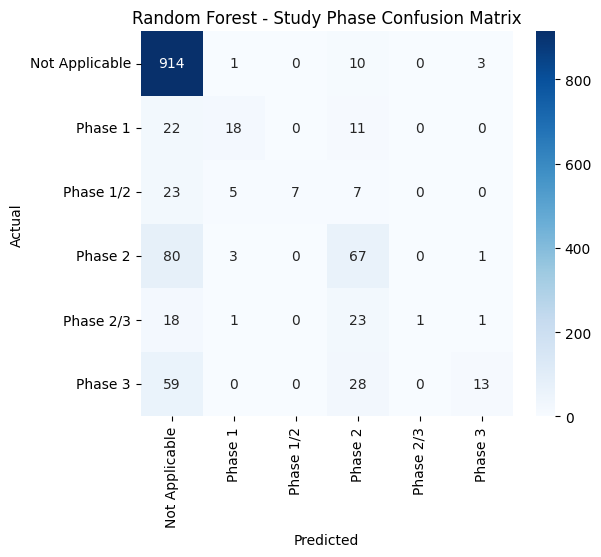

In [71]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_phase_test, rf_phase_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=phase_encoder.classes_,
            yticklabels=phase_encoder.classes_)
plt.title("Random Forest - Study Phase Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. XGBoost Classifier

In [72]:
xgb_phase = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
xgb_phase.fit(X_train, y_phase_train)
xgb_phase_pred = xgb_phase.predict(X_test)

print("=== XGBoost: Study Phase Classification ===")
print(classification_report(y_phase_test, xgb_phase_pred, target_names=phase_encoder.classes_))
print("Accuracy:", accuracy_score(y_phase_test, xgb_phase_pred))

=== XGBoost: Study Phase Classification ===
                precision    recall  f1-score   support

Not Applicable       0.91      0.96      0.93       928
       Phase 1       0.78      0.55      0.64        51
     Phase 1/2       0.50      0.21      0.30        42
       Phase 2       0.49      0.63      0.55       151
     Phase 2/3       0.43      0.14      0.21        44
       Phase 3       0.50      0.34      0.40       100

      accuracy                           0.81      1316
     macro avg       0.60      0.47      0.51      1316
  weighted avg       0.79      0.81      0.79      1316

Accuracy: 0.810790273556231


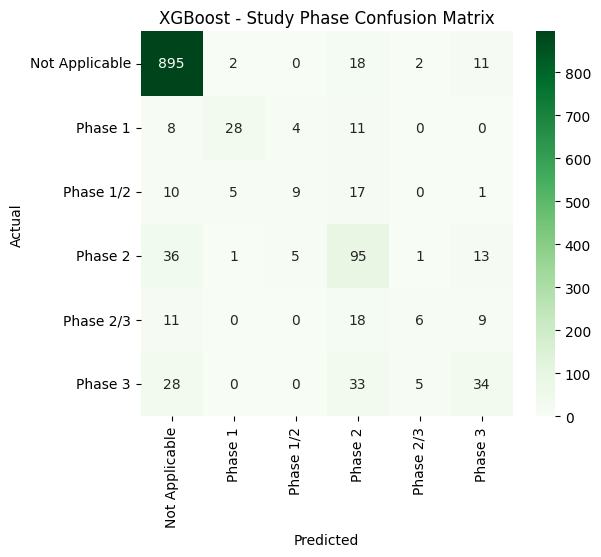

In [73]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_phase_test, xgb_phase_pred),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=phase_encoder.classes_,
            yticklabels=phase_encoder.classes_)
plt.title("XGBoost - Study Phase Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Predicting Study Type

#### 1. Random Forest Classifier

In [75]:
rf_study = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_study.fit(X_train, y_study_train)
rf_study_pred = rf_study.predict(X_test)

print("=== Random Forest: Study Type Classification ===")
print(classification_report(y_study_test, rf_study_pred, target_names=studytype_encoder.classes_))
print("Accuracy:", accuracy_score(y_study_test, rf_study_pred))

=== Random Forest: Study Type Classification ===
                precision    recall  f1-score   support

Interventional       0.56      0.81      0.67       746
 Observational       0.42      0.18      0.25       570

      accuracy                           0.54      1316
     macro avg       0.49      0.49      0.46      1316
  weighted avg       0.50      0.54      0.49      1316

Accuracy: 0.5372340425531915


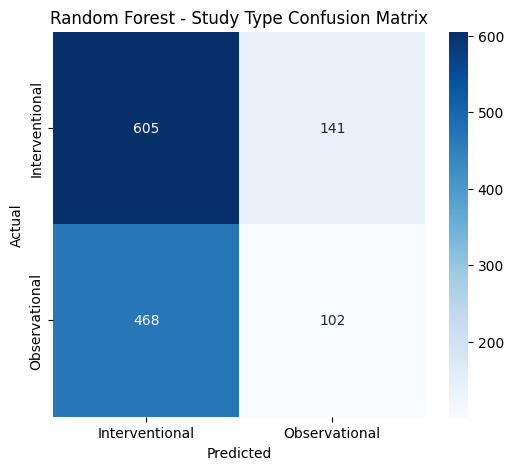

In [76]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_study_test, rf_study_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=studytype_encoder.classes_,
            yticklabels=studytype_encoder.classes_)
plt.title("Random Forest - Study Type Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. XGBoost Classifier

In [77]:
xgb_study = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)
xgb_study.fit(X_train, y_study_train)
xgb_study_pred = xgb_study.predict(X_test)

print("=== XGBoost: Study Type Classification ===")
print(classification_report(y_study_test, xgb_study_pred, target_names=studytype_encoder.classes_))
print("Accuracy:", accuracy_score(y_study_test, xgb_study_pred))

=== XGBoost: Study Type Classification ===
                precision    recall  f1-score   support

Interventional       0.56      0.68      0.61       746
 Observational       0.43      0.32      0.36       570

      accuracy                           0.52      1316
     macro avg       0.50      0.50      0.49      1316
  weighted avg       0.50      0.52      0.51      1316

Accuracy: 0.5197568389057751


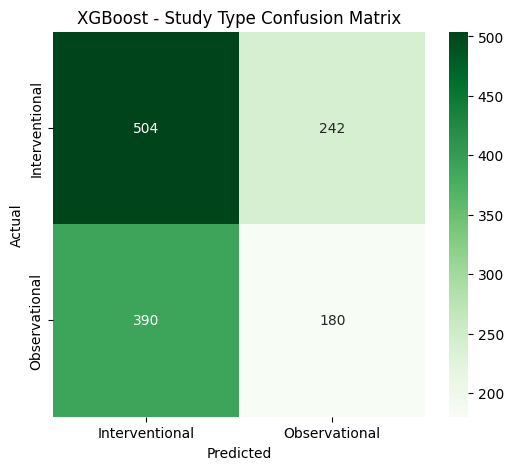

In [78]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_study_test, xgb_study_pred),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=studytype_encoder.classes_,
            yticklabels=studytype_encoder.classes_)
plt.title("XGBoost - Study Type Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Compare Results

In [79]:
results = pd.DataFrame({
    'Model': ['Random Forest (Phase)', 'XGBoost (Phase)', 'Random Forest (Study Type)', 'XGBoost (Study Type)'],
    'Accuracy': [
        accuracy_score(y_phase_test, rf_phase_pred),
        accuracy_score(y_phase_test, xgb_phase_pred),
        accuracy_score(y_study_test, rf_study_pred),
        accuracy_score(y_study_test, xgb_study_pred)
    ]
})

print(results)

                        Model  Accuracy
0       Random Forest (Phase)  0.775076
1             XGBoost (Phase)  0.810790
2  Random Forest (Study Type)  0.537234
3        XGBoost (Study Type)  0.519757
